<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2
#### Milena Waichman Scigliano


# Introduccion

En este informe vamos a estar trabajando con sistemas LTI, linales e invariantes en el tiempo. Es decir, es un sistema cuyo comportamiento se puede predecir a partir de su respuesta previa al impulso. Es decir:
$$ y[n]=(x*h)[n]=\sum_{k=-\infty}^{\infty}x[k]h[n-k]$$
Conocer como responde el sistema a un impulso permite saber como va a responder a cualquier señal. Los sistemas LTI pueden ser descritos con ecuaciones en diferencias que permite calcular la salida $y[n]$ a partir de valores actuales y pasados de la entrada $x[n]$ y de la salida misma. La ecuacion en diferencias es la forma de representar una ecuacion diferencias en tiempo discreto y se hace de la siguiente manera:
$$y[n]=\sum_{k=0}^{N}b_k\cdot x[n-k] + \sum_{k=0}^{M}a_k\cdot y[n-k]$$
Usando la funcion *lfilter* de la libreria scipy.signal se puede resolver esta ecuacion en diferencias a partir de los coeficiente *b* y *a*.
A continuacion analizaremos con detalle la diferencia las diferentes formas de calcular la salida de un sistema LTI, como se calcula la respuesta al impulso y como se comporta el sistema en general frente a diferentes señales de entrada.

# 1) Señales de salida y respuesta al impulso

## Graficar las señales de salida

Usando las señales generadas en el TS1 como entrada para nuestro sistema LTI descrito por la siguiente ecuacion en diferencias:
$$y[n]=3\cdot 10^{-2}\cdot x[n]+5\cdot 10^{-2}\cdot x[n-1]+3\cdot 10^{-2}\cdot x[n-2]+1,5\cdot y[n-1]-0,5\cdot y[n-2]$$
Se calculo la señal de salida usando el *lfilter*, el cual usando los coeficientes de la ecuacion la resuelve paso a paso para la señal de entrada *x[n]*. Las salidas se graficaron y se calculo su energia o potencia, dependiendo del tipo de señal, usando las mismas formulas del TS1.

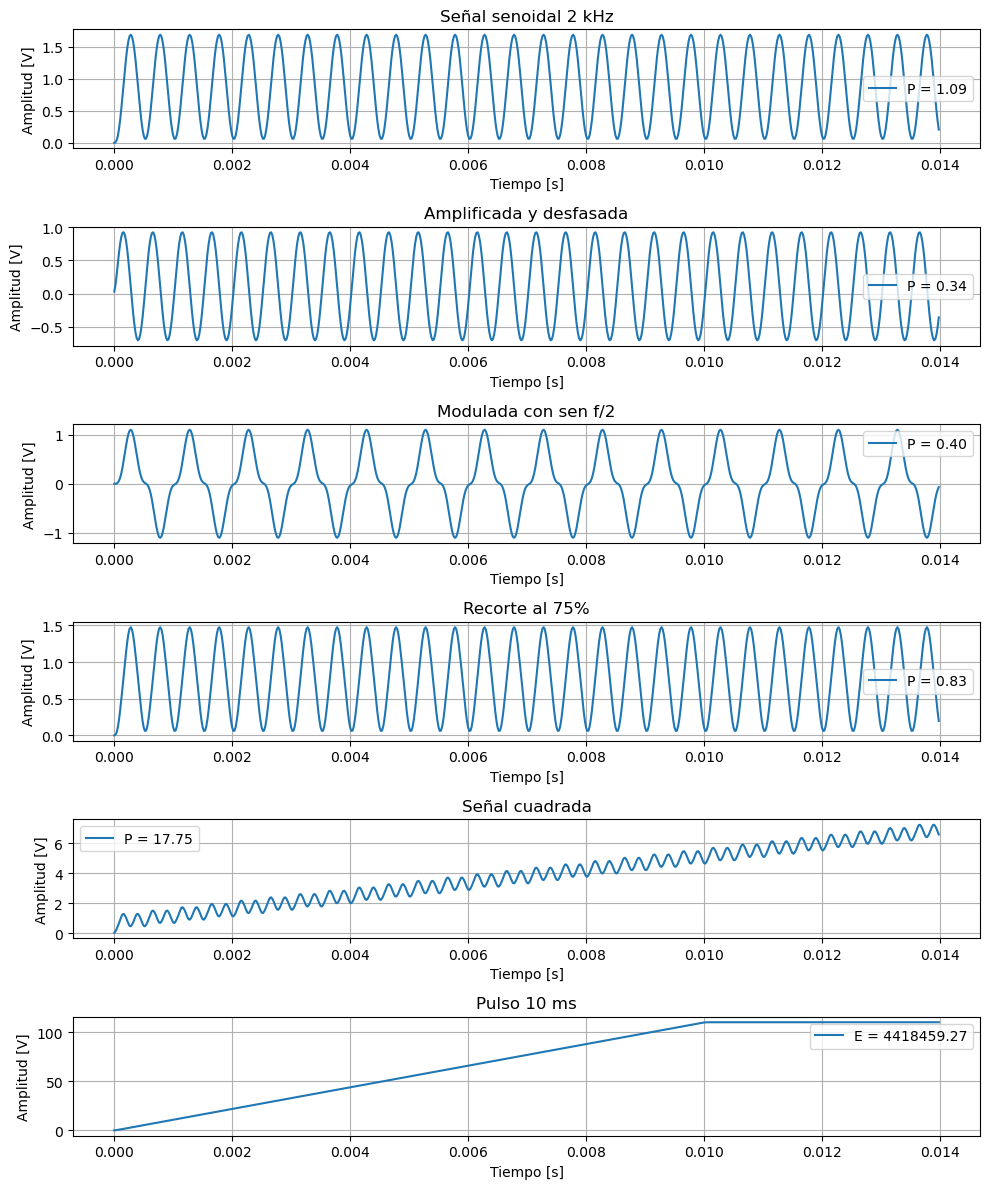

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#𝑦[𝑛]-1.5⋅𝑦[𝑛−1]+0.5⋅𝑦[𝑛−2]=3⋅10−2⋅𝑥[𝑛]+5⋅10−2⋅𝑥[𝑛−1]+3⋅10−2⋅𝑥[𝑛−2]
 
a = np.array([1, -1.5, 0.5]) #coeficientes de y
b = np.array([0.03, 0.05, 0.03]) #coeficientes de x

fs = 50000 # frecuencia de muestreo, aplica para todas las señales
N = 700  # cantidad de muestras, aplica para todas las señales 
fx = 2000 #frecuencia para las senoidales
Ts = 1/fs
t = np.arange(N) * Ts


def mi_funcion_sen (A0, fx, phase, t ):
    x = A0 * np.sin(2 * np.pi * fx * t + phase)
    return x

def funcion_cuadrada (fcuad):
    x = signal.square(2 * np.pi * fcuad * t)
    return x

def pulsos(t, T):
    pulso = np.where(t < T, 1.0, 0.0)
    return pulso

#señal original
x_senoidal = mi_funcion_sen(A0 = 1, fx = fx, phase = 0, t = t)

#señal desfazada
x_desfazada = mi_funcion_sen(A0 = 1, fx = fx, phase = np.pi/2, t = t)

#señal modulada con una de la mitad de su frecuencia
x_aux = mi_funcion_sen(A0 = 1, fx = fx/2, phase = 0, t = t)
x_modulada = x_senoidal * x_aux

#señal recortada al 75%
x_recortada = np.clip(x_senoidal, -0.75, 0.75, out=None)

#señal cuadrada 4KHz
x_cuadrada = funcion_cuadrada(fcuad = 4000)

#pulso de 10ms
x_pulsos = pulsos(t, 0.01)

entradas = [x_senoidal, x_desfazada, x_modulada, x_recortada, x_cuadrada, x_pulsos]

salidas = []
potencia = []
energia = []
for i, x in enumerate(entradas):
    y = signal.lfilter(b, a, x)
    salidas.append(y)

    
#Graficos
fig, axs = plt.subplots(6, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Señal senoidal
axs[0].plot(t, salidas[0], label = f"P = {np.mean(salidas[0]**2):.2f}")
axs[0].set_title("Señal senoidal 2 kHz")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud [V]")
axs[0].legend()
axs[0].grid(True)

# Amplificada y desfasada
axs[1].plot(t, salidas[1], label = f"P = {np.mean(salidas[1]**2):.2f}")
axs[1].set_title("Amplificada y desfasada")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud [V]")
axs[1].legend()
axs[1].grid(True)

# Modulacion en amplitud
axs[2].plot(t, salidas[2], label = f"P = {np.mean(salidas[2]**2):.2f}")
axs[2].set_title("Modulada con sen f/2")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud [V]")
axs[2].legend()
axs[2].grid(True)

# Señal recortada
axs[3].plot(t, salidas[3], label = f"P = {np.mean(salidas[3]**2):.2f}")
axs[3].set_title("Recorte al 75%")
axs[3].set_xlabel("Tiempo [s]")
axs[3].set_ylabel("Amplitud [V]")
axs[3].legend()
axs[3].grid(True)

# Señal cuadrada
axs[4].plot(t, salidas[4], label = f"P = {np.mean(salidas[4]**2):.2f}")
axs[4].set_title("Señal cuadrada")
axs[4].set_xlabel("Tiempo [s]")
axs[4].set_ylabel("Amplitud [V]")
axs[4].legend()
axs[4].grid(True)

# Pulso rectangular
axs[5].plot(t, salidas[5], label = f"E = {np.sum(salidas[5]**2):.2f}")
axs[5].set_title("Pulso 10 ms")
axs[5].set_xlabel("Tiempo [s]")
axs[5].set_ylabel("Amplitud [V]")
axs[5].legend()
axs[5].grid(True)

# Ajustar todo
plt.tight_layout()
plt.show()

Los sistemas LTI pueden ser estables o inestables, esto lo define su funcion de transferencia, cuyo numerador es la suma de coeficientes de *x* y denominador la de coeficientes de *y*:
$$H(z)=\frac{B(z)}{A(z)}$$
Los polos de *H(z)* son las raices de *A(z)* y son aquellos valores de *z* que vuelven a la funcion infinita. Los polos indincan el comportamiento del sistema, definiendo si la salida crece, oscila o decae. Si los polos se encuentran dentro del circulo unitario ($|z|<1$), el sistema es estable, la respuesta decae. Si los polos estan fuera del circulo ($|z|>1$), el sistema es inestable, las respuestas crecen sin limite. Finalmente, si existe algun polo exactamente en el circulo unitario ($|z|=1$), el comportamiento suele varias y tiende a oscilar.

En el caso de nuestro sistema los polos son:
$$z_1=1, z_2=0,5$$
Por lo que podemos definir al sistema como marginalmente estable, lo que se traduce en los graficos de las señales de entrada de distintas formas acorde a la señal. Se puede definir *DC* como el promedio de la señal, si este es distinto de cero, en este caso la señal va a presentar crecimiento. Algunas señales mantienen su comportamiento estable por tener un *DC=0*, en cambio otras como la cuadrada o el pulso no tanto. En el caso de la cuadrada, se ve oscilante como respuesta a su frecuencia fundamental mientras que el crecimiento lineal se debe a la relacion de su *DC* con el polo $z_1=1$. En el caso del pulso, el crecimiento se da mientras la señal esta encendida, al apagarse se vuelve constante.



## Respuesta al impulso

La respuesta al impulso se define como la salida de un sistema LTI cuando la entrada es un sistema unitario y se calcula usando *lfilter* nuevamente, pero esta vez en lugar de pasarle la señal de entrada senoidal, se reemplaza con una delta.

Teniendo en cuenta que la salida del sistema se puede calcular resolviendo la ecuacion en diferencias con *lfilter* con la señal senoidal como entrada, asi como tambien convolucionando la respuesta al impulso $h[n]$ con la senoidal. Por lo que graficamente deberian ser iguales, eso se comprueba en el grafico a continuacion.

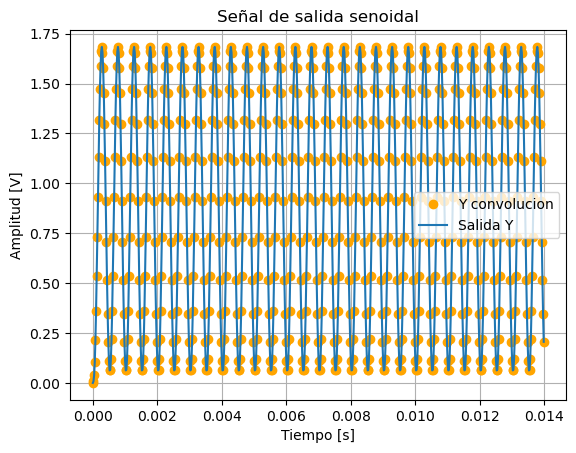

In [4]:
##CALCULAR LA RESPUESTA AL IMPULSO
delta = np.zeros(len(x_senoidal))
delta[0] = 1

h = signal.lfilter(b, a, delta)  #respuesta al impulso

y_conv = np.convolve(x_senoidal, h)[:len(x_senoidal)] #salida

plt.figure()
plt.plot(t, y_conv, "o", color='orange' , label="Y convolucion")
plt.plot(t, salidas[0], label="Salida Y")
plt.title("Señal de salida senoidal")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.legend()
plt.grid(True)
plt.show()

# 2) Respuesta al impulso y salida de sistemas LTI

Usando lo visto en el punto 1, se resolvieron los dos sistemas propuestos usando *lfilter*. El primer sistema definido como:
$$y[n]=x[n]+3\cdot x[n-10]$$
En este caso, como la ecuacion tiene varios terminos nulos, por lo que para armar el array de coeficientes hubo que definirlo de otra manera como se muestra a continuacion.

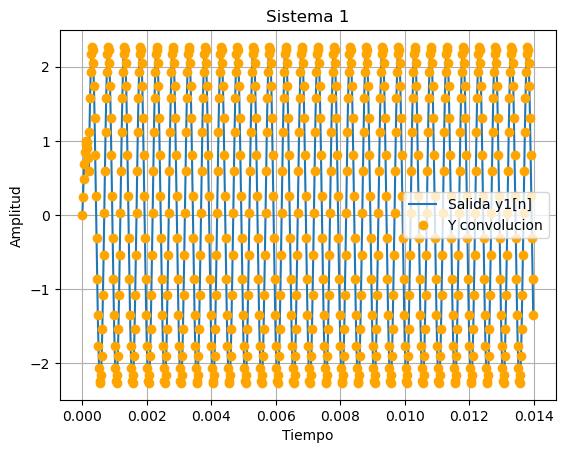

In [5]:
a1 = np.array([1]) #coeficientes de y
b1 = np.zeros(11) #coeficientes de x
b1[0] = 1
b1[10] = 3

h1 = signal.lfilter(b1, a1, delta)  #respuesta al impulso
y1_conv= np.convolve(x_senoidal, h1)[:len(x_senoidal)]
y1 = signal.lfilter(b1, a1, x_senoidal)

plt.figure()
plt.plot(t, y1, label="Salida y1[n]")
plt.plot(t, y1_conv, "o",color='orange' , label="Y convolucion")
plt.title("Sistema 1")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)


Nuevamente se calculo la salida, tanto con convolucion usando la respuesta al impulso, como con *lfilter* y los datos de los coeficientes. En el grafico se ve como ambos coinciden a la perfeccion.



El segundo sistema representado con la ecuacion en diferencias:
$$y[n]=x[n]+3\cdot y[n-10]$$
Este presenta la misma situacion de los terminos nulos, en este caso con lo de y, pero se utilizo la misma idea para resolverlo

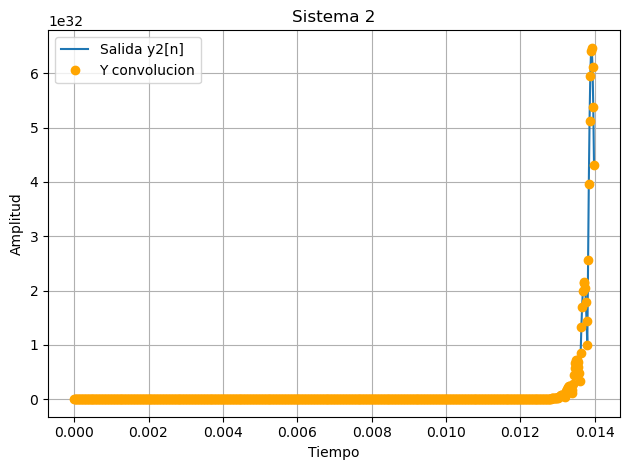

In [6]:
a2 = np.zeros(11) #coeficientes de y
a2[0] = 1
a2[10] = -3

b2 = np.array([1]) #coeficientes de x

h2 = signal.lfilter(b2, a2, delta)  #respuesta al impulso
y2_conv = np.convolve(x_senoidal, h2)[:len(x_senoidal)]
y2 = signal.lfilter(b2, a2, x_senoidal)

plt.figure()
plt.plot(t, y2, label="Salida y2[n]")
plt.plot(t, y2_conv, "o",color='orange' , label="Y convolucion")
plt.title("Sistema 2")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Nuevamente podemos ver la similitud entre ambos graficos de salida, lo que verifica el lo calculado en el codigo.

# 3) Bonus

El modelo de Windkessel permite calcular el gasto cardiaco a traves de un analisis de contorno del pulso.
La impedancia arterial ($Z$), descubierta por el fisiologo Otto Frank, representa las cualidades físicas de las arterias, es decir, las resistencias que encuentra la sangre al circular por las mismas. Lo que se traduce en cambios de presión y volumen. Estas variaciones pueden deberse a:
- Fuerza de eyección del ventrículo izquierdo.
- Compliancia arterial. La cual absorbe parte de la energía cinética generada (distensibilidad arterial).
- Resistencia de los vasos periféricos.
- Ondas reflejadas
En 1899, Frank introdujo un nuevo enfoque en el sistema arterial basado en el modelo alemán denominado **Windkessel**. El modelo Windkessel era utilizado por los bomberos alemanes en el s. XIX para apagar los incendios. Este método consistía en transformar un flujo pulsátil de agua en continuo.
![Modelo Windkessel utilizado por bomberos en siglo XIX](https://campusvygon.com/es/wp-content/uploads/sites/7/2020/11/72PX-wirdkensell-BOMBEROS-01-1536x545.jpg)
Este modelo trasladado al sistema cardiovascular, intercambia los compartimentos de la siguiente manera:
- Sistema reservorio: venas.
- Bomba pulsátil: corazón.
- Componente elástico/dinámico: grandes arterias como la aorta o la arteria femoral. Estos grandes vasos se encargan de absorber parte de la energía del latido cardíaco para mantener el flujo continuo durante todo el ciclo cardíaco tras el cierre de la válvula aortica.
- Componente restrictivo: componente estático que se encuentra en las arteriolas periféricas.
![Modelo Windkessel cardivascular](https://campusvygon.com/es/wp-content/uploads/sites/7/2020/11/72PX-wirdkensell-SISTEMA-CARDIO-VASCULAR-02-1536x637.jpg)
Este modelo permite calcular el gasto cardíaco a través de un análisis del contorno del pulso, sin olvidar que la clave para su análisis es la Z.
El modelo de Windkessel puede ser representado por la siguiente ecuacion diferencial:
$$C\cdot \frac{dP}{dt}+\frac{1}{R}\cdot P=Q \Leftrightarrow \frac{dP(t)}{dt}+\frac{1}{RC}P(t)=\frac{1}{C}Q(t)$$
donde $P(t)=presion, Q(t)=flujo, C=compliance y R=resistencia periferica$, a partir de ahora definiremos $\tau=RC$. Para discretizar la ecuacion usaremos el metodo de *Backward Euler*.

Aproximacion (evaluado en n):
$$\frac{dP}{dt}\approx \frac{P[n]-P[n-1]}{T_s}$$
Susituyendo:
$$C\frac{P[n]-P[n-1]}{T_s}+\frac{1}{R}P[n]=Q[n]$$
Reordenando:
$$(\frac{C}{T_s}+\frac{1}{R})P[n]=\frac{C}{T_s}P[n-1]+Q[n]$$
Entonces
$$P[n]=\frac{\frac{C}{T_s}P[n-1]+Q[n]}{\frac{C}{T_s}+\frac{1}{R}}$$

Usando la discretizacion para simular en Python, usaremos los siguiente valores de referencia:
- *R* (resistencia vascular sistemica) tipica $\approx 0,15-0,33 mmHg\cdot s \cdot mL^9-1)$
- *C* (compliance arterial) tipica: \approx 4-5 mL/mmHg
- $\tau=RC$ suele estar en el orden de $0,5-3 s$

A continuacion veremos los graficos para un latido discretizado y para un tren de latidos.


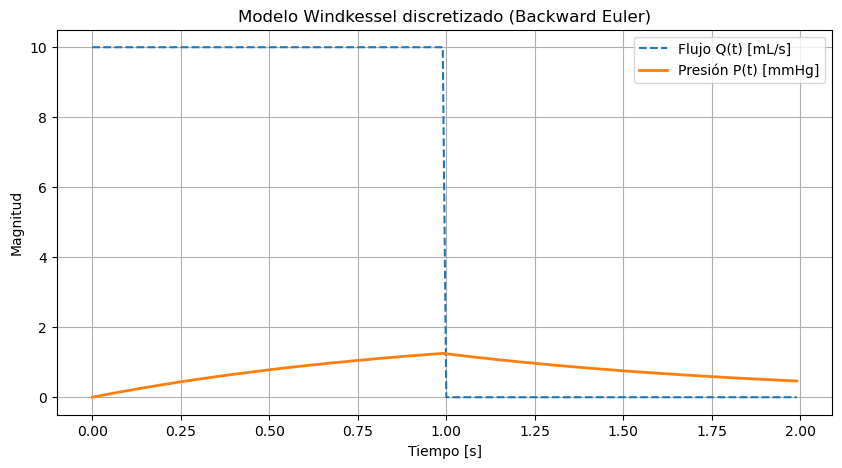

In [7]:
C = 5.0     # mL/mmHg
R = 0.2     # mmHg·s/mL
Ts_wk = 0.01   # paso temporal [s]
T_wk = 2       # tiempo total [s]
N_wk = int(T_wk / Ts_wk)

# Señal de entrada: flujo Q(t)
t_wk = np.arange(N_wk) * Ts_wk
Q = 10 * (t_wk < 1)   # flujo constante de 10 mL/s durante 1 segundo

# Inicialización de presión
P = np.zeros(N_wk)
P[0] = 0  # condición inicial

# Coeficientes para Backward Euler
alpha = C / Ts_wk
den = alpha + 1 / R

# Iteración recursiva
for n in range(1, N_wk):
    P[n] = (alpha * P[n-1] + Q[n]) / den

# Graficar resultados
plt.figure(figsize=(10,5))
plt.plot(t_wk, Q, label="Flujo Q(t) [mL/s]", linestyle="--")
plt.plot(t_wk, P, label="Presión P(t) [mmHg]", linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Magnitud")
plt.title("Modelo Windkessel discretizado (Backward Euler)")
plt.legend()
plt.grid(True)
plt.show()

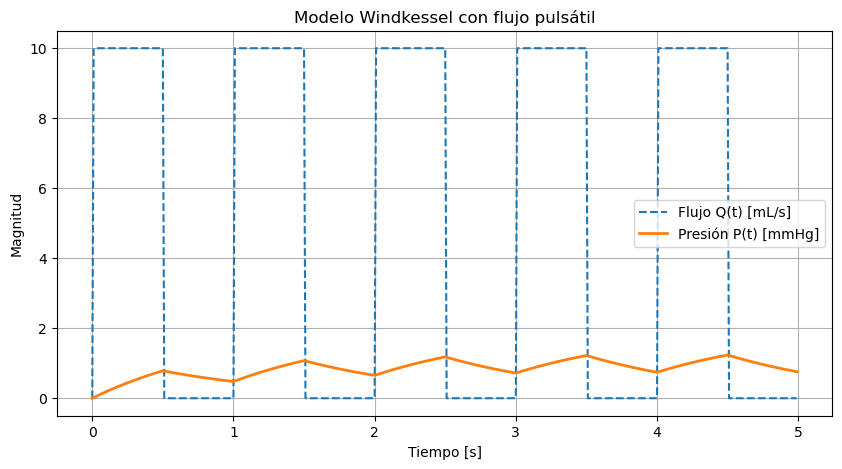

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros fisiológicos
C = 5.0       # mL/mmHg
R = 0.2       # mmHg·s/mL
Ts = 0.01     # paso temporal [s]
T_total = 5   # tiempo total [s] para varios latidos
N = int(T_total / Ts)

# Señal de entrada: flujo Q(t) pulsátil (simula 1 Hz, 60 latidos/min)
f_heart = 1.0  # Hz
t = np.arange(N) * Ts
Q = 10 * (np.sin(2 * np.pi * f_heart * t) > 0)  # tren de pulsos

# Inicialización de presión
P = np.zeros(N)
P[0] = 0  # condición inicial

# Coeficientes para Backward Euler
alpha = C / Ts
den = alpha + 1/R

# Iteración recursiva (Backward Euler)
for n in range(1, N):
    P[n] = (alpha * P[n-1] + Q[n]) / den

# Graficar resultados
plt.figure(figsize=(10,5))
plt.plot(t, Q, label="Flujo Q(t) [mL/s]", linestyle="--")
plt.plot(t, P, label="Presión P(t) [mmHg]", linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Magnitud")
plt.title("Modelo Windkessel con flujo pulsátil")
plt.legend()
plt.grid(True)
plt.show()

En el primero grafico vemos como se representa el flujo de sangre que entra al sistema de forma constante, despues decae bruscamente a cero y se mantiene constante para un latido. La presion resultante de ese flujo representa la capacidad que tiene el vaso de expandirse (Compliance) en la parte creciente, y la oposicion al flujo (Resistencia) que provoca la caida en el grafico. 

En el grafico del tren de pulsos vemos como el flujo se comporta de manera periodica para cada latido, pero la presion va aumentando de magnitud, esto se debe a la cercania entre pulsos que no permite que vuelva a cero, por lo que cada nuevo pulso "se suma" a la presion que quedo del pulso anterior para poder estabilizarse.

# Conclusion

En este trabajo aprendi a resolver ecuacion en diferencias usando la funcion *lfilter* de la libreria *signal* de *scipy*, como calcular respuestas al impulso y con ellas, usando convolucion poder obtener la salida de mi sistema. Se estudio en detalle como se comportan los sistemas LTI ante distintas señales de entrada, como varia su energia o potencia y como la naturaleza de sus polos se encarga de modelar la señal de salida. Discetice mi primera ecuacion diferencial, lo que me permitio investigar sobre modelos biomedicos y su utilidad en el campo de la medicina, lo que me resulto muy interesante para poder aplicar estos conceptos, capaz un poco abstractos, a un caso real como puede ser el calculo del gasto cardiaco.

Este informe cuenta con mucho respaldo teorico para poder comprender los comportamientos de los sistemas y las señales, hay algunas cosas que todavia resultan un poco confusas, pero el hecho de trabajar con un ejemplo real me ayudo a bajar muchas cosas a tierra.

En conclusion, el trabajo no resulto complejo de realizar, ya que era bastante repetitivo, pero requirio de trabajo de investigacion para comprender porque pasaban ciertas cosas.

## Bibliografia

- [](https://campusvygon.com/es/evolucion-analisis-contorno-del-pulso/)
- [](https://revistadigital.amca.mx/wp-content/uploads/2022/06/MieBT2-03.pdf)

## Autoevaluacion

*Indicar una opción (marcada con negrita):*

**Resolví la tarea con seguridad**
Resolví la tarea, pero tengo dudas
Resolví la tarea,pero no entendí bien
No pude resolverla y no entendí
Responder:

*¿Qué aprendiste al hacer esta tarea?*

En esta tarea aprendi a resolver ecuaciones en diferencias y a analizar la salida de los sistemas LTI aante distintas señales de entrada. Aprendi a calcular la salida de distintas formas, como hallar la respuesta al impulso y como trabajar con ella. Modele mi primer sistema biomedico, lo que me resulto muy interesante de hacer.

*¿Qué te quedó claro? ¿Qué te sigue costando?*

Me quedaron algunas dudas con respecto al analisis de las salidas de los sistemas y la relacion de los polos con la señal generada.

*Indicar si se utilizó IA:*

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**
No usé IA.
*En caso afirmativo, indicar una opción o varias:*

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones